In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_iris = pd.read_csv('iris.csv')
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Calculo de codo, inercia optima

<IPython.core.display.Math object>

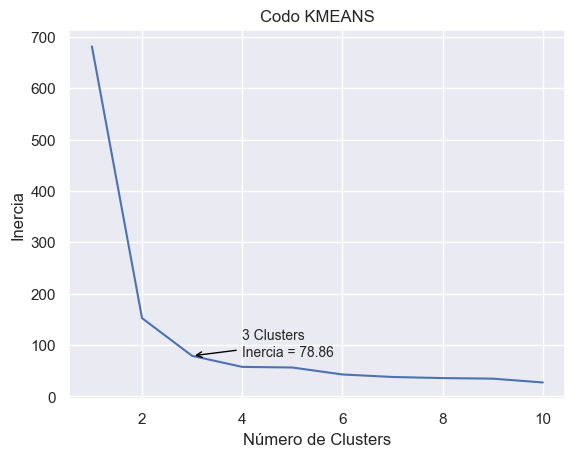

Cluster 1: Inercia = 681.37
Cluster 2: Inercia = 152.35
Cluster 3: Inercia = 78.86
Cluster 4: Inercia = 57.38
Cluster 5: Inercia = 56.17
Cluster 6: Inercia = 42.61
Cluster 7: Inercia = 37.73
Cluster 8: Inercia = 35.57
Cluster 9: Inercia = 34.48
Cluster 10: Inercia = 27.07


In [17]:
#Conjunto de entrenamiento, ya que el etiquetado real es 'Variety'
df_entrenamiento_iris = df_iris.iloc[:, 0:4]

#Calculo de inercias, probando modelos con clusters del 1 al 10
Inercias = []
for NClusters in range(1,11):
    ModeloKMeans = KMeans(n_clusters=NClusters, random_state=1).fit(df_entrenamiento_iris)
    Inercias.append(ModeloKMeans.inertia_)

from IPython.display import Math, display
display(Math(r'\text{Inercia} = \sum_{i=1}^{n} \| x_i - c_k \|^2'))

sns.set()
plt.plot(range(1,11), Inercias)
plt.title('Codo KMEANS')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')


#Anotacion de cluster optimo en grafica
plt.annotate(
    f'3 Clusters\nInercia = {Inercias[2]:.2f}',  # Texto de la anotación
    xy=(3, Inercias[2]),  # Coordenadas del punto
    xytext=(4, Inercias[2]),  # Desplazamiento del texto de anotación
    arrowprops=dict(facecolor='black', arrowstyle='->', color='black'),  # Estilo de la flecha
    fontsize=10  # Tamaño de fuente
)

plt.show()



for i, inercia in enumerate(Inercias, start=1):
    print(f'Cluster {i}: Inercia = {inercia:.2f}')

## Calculo de silhouette

In [18]:
from sklearn.metrics import silhouette_score

for iteracion in range(2, 11):
    kmeansSilhouette = KMeans(n_clusters=iteracion, random_state=1).fit(df_entrenamiento_iris.to_numpy())
    gruposSilhouette = kmeansSilhouette.fit_predict(df_entrenamiento_iris.to_numpy())
    score = silhouette_score(df_entrenamiento_iris.to_numpy(), gruposSilhouette)
    print(f'Puntaje Silhouette iteracion {iteracion} : {score:3f}')

Puntaje Silhouette iteracion 2 : 0.681046
Puntaje Silhouette iteracion 3 : 0.551192
Puntaje Silhouette iteracion 4 : 0.495356
Puntaje Silhouette iteracion 5 : 0.442077
Puntaje Silhouette iteracion 6 : 0.442463
Puntaje Silhouette iteracion 7 : 0.460947
Puntaje Silhouette iteracion 8 : 0.451400
Puntaje Silhouette iteracion 9 : 0.417850
Puntaje Silhouette iteracion 10 : 0.313120


### El mejor puntaje fue con 2 clusters, aunque esta opcion o resolucion puede ser mas generalizada, ya que en realidad sí existen 3 tipos de flor.  
### Puntaje Silhouette iteracion 2 : 0.681046

In [19]:
kmeans_optimo = KMeans(n_clusters=3, init= 'k-means++', random_state=1).fit(df_entrenamiento_iris)
clusters = kmeans_optimo.predict(df_entrenamiento_iris)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
df_iris_agrupado = df_iris
df_iris_agrupado['grupo_optimo'] = clusters
df_iris_agrupado.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,grupo_optimo
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


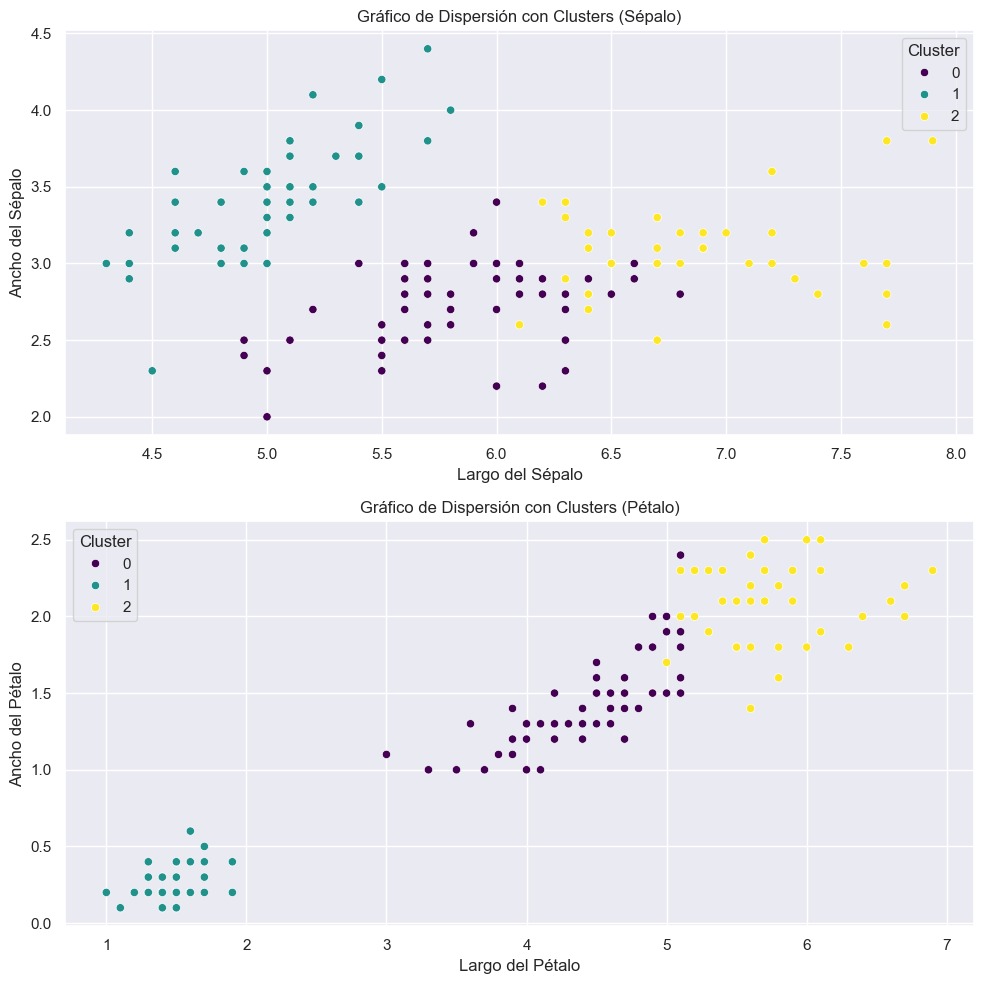

In [21]:
# Crear subplots con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # Dos filas, un gráfico por fila

# Primer gráfico: sepal.length vs sepal.width
sns.scatterplot(
    data=df_iris_agrupado, 
    x='sepal.length', 
    y='sepal.width', 
    hue='grupo_optimo', 
    palette='viridis', 
    ax=axes[0]  # Usar el primer subplot
)
axes[0].set_title('Gráfico de Dispersión con Clusters (Sépalo)')
axes[0].set_xlabel('Largo del Sépalo')
axes[0].set_ylabel('Ancho del Sépalo')
axes[0].legend(title='Cluster')

# Segundo gráfico: petal.length vs petal.width
sns.scatterplot(
    data=df_iris_agrupado, 
    x='petal.length', 
    y='petal.width', 
    hue='grupo_optimo', 
    palette='viridis', 
    ax=axes[1]  # Usar el segundo subplot
)
axes[1].set_title('Gráfico de Dispersión con Clusters (Pétalo)')
axes[1].set_xlabel('Largo del Pétalo')
axes[1].set_ylabel('Ancho del Pétalo')
axes[1].legend(title='Cluster')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


## Importacion de normalizacion y decomposicion

In [22]:
from sklearn.preprocessing import normalize
from sklearn import decomposition as decomp

## Escalado de datos de entrenamiento

In [23]:
df_entrenamiento_iris_scaled = pd.DataFrame(normalize(df_entrenamiento_iris))
df_entrenamiento_iris_scaled.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


## Transformacion PCA (Principal Component Analysis) 
### (Reduccion de dimensionalidad)

In [24]:
pca =  decomp.PCA(n_components=2)
df_irisPCA = pca.fit_transform(df_entrenamiento_iris_scaled)
df_irisPCA[:5]

array([[-0.30163722, -0.00071565],
       [-0.27092065, -0.04235377],
       [-0.29767949, -0.00240655],
       [-0.26266611, -0.00266704],
       [-0.30746945,  0.01871929]])

In [31]:
# Modelos con PCA
kmeans2_optimo_codo = KMeans(n_clusters=3, init= 'k-means++', random_state=1).fit(df_entrenamiento_iris_scaled)
kmeans2_optimo_silhouette = KMeans(n_clusters=2, init= 'k-means++', random_state=1).fit(df_entrenamiento_iris_scaled)

# Grupos de CODO Y SILHOUETTE con PCA
grupos2Codo = kmeans2_optimo_codo.predict(df_entrenamiento_iris_scaled)
grupos2S = kmeans2_optimo_silhouette.predict(df_entrenamiento_iris_scaled)


grupos2Codo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
df_iris_agrupado2= df_iris
df_iris_agrupado2['grupo_codo']= grupos2Codo
df_iris_agrupado2['grupo_silhouette']= grupos2S
df_iris_agrupado2[['variety', 'grupo_codo', 'grupo_silhouette']].groupby(['variety', 'grupo_codo', 'grupo_silhouette']).size().reset_index(name='count')

,variety,grupo_codo,grupo_silhouette,count
0,Setosa,1,1,50
1,Versicolor,0,0,45
2,Versicolor,2,0,5
3,Virginica,2,0,50


In [27]:
df_iris_agrupado[['variety', 'grupo_optimo']].groupby(['variety', 'grupo_optimo']).size().reset_index(name='count')

,variety,grupo_optimo,count
0,Setosa,1,50
1,Versicolor,0,47
2,Versicolor,2,3
3,Virginica,0,14
4,Virginica,2,36


### Aquí lo llamativo es que el cluster sin PCA y normalizado de datos no fue muy bueno clasificando mientras que el que tuvo preprocesamiento de PCA y normalizacion si tuvo una mejor clasificación, se recomendaría mejorar el codigo con algun especie de grid search para mejorar la agrupación con sus parametros internos de KMEANS. También se aprecia que si se generaliza con silhouette en dos grupos se manda VERSICOLOR Y VIRGINICA al mismo grupo con conteo de 100

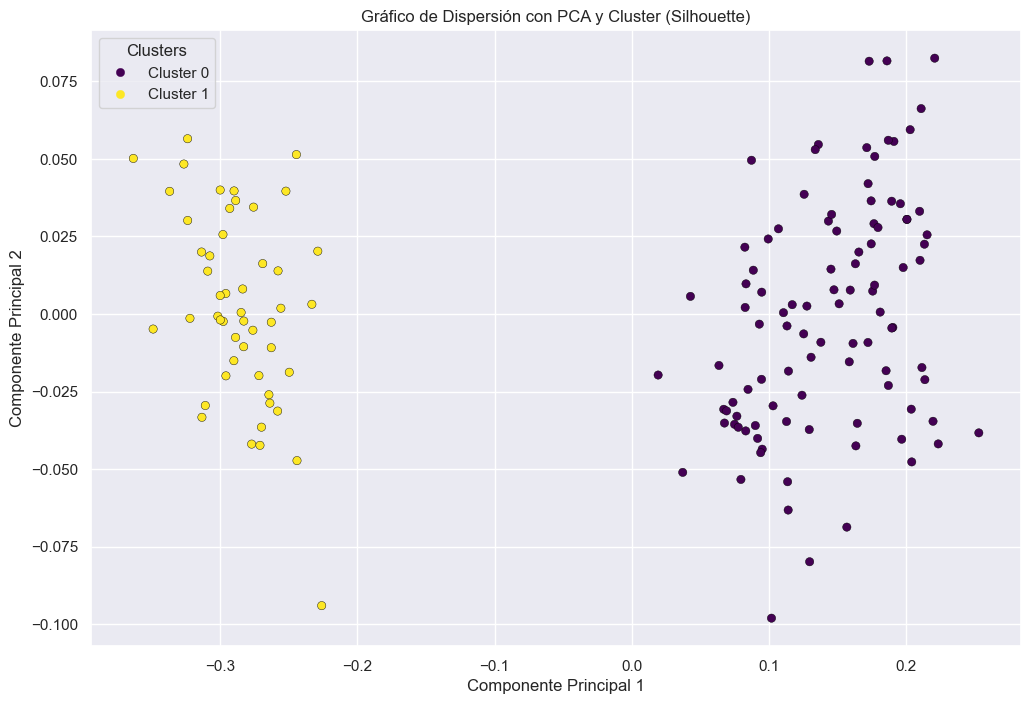

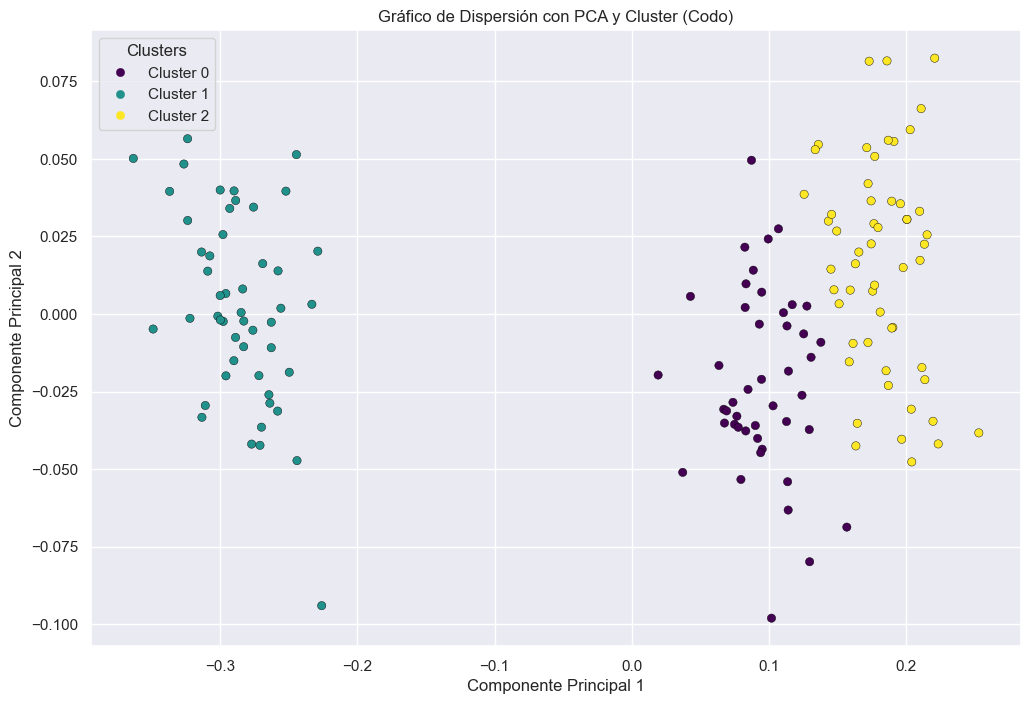

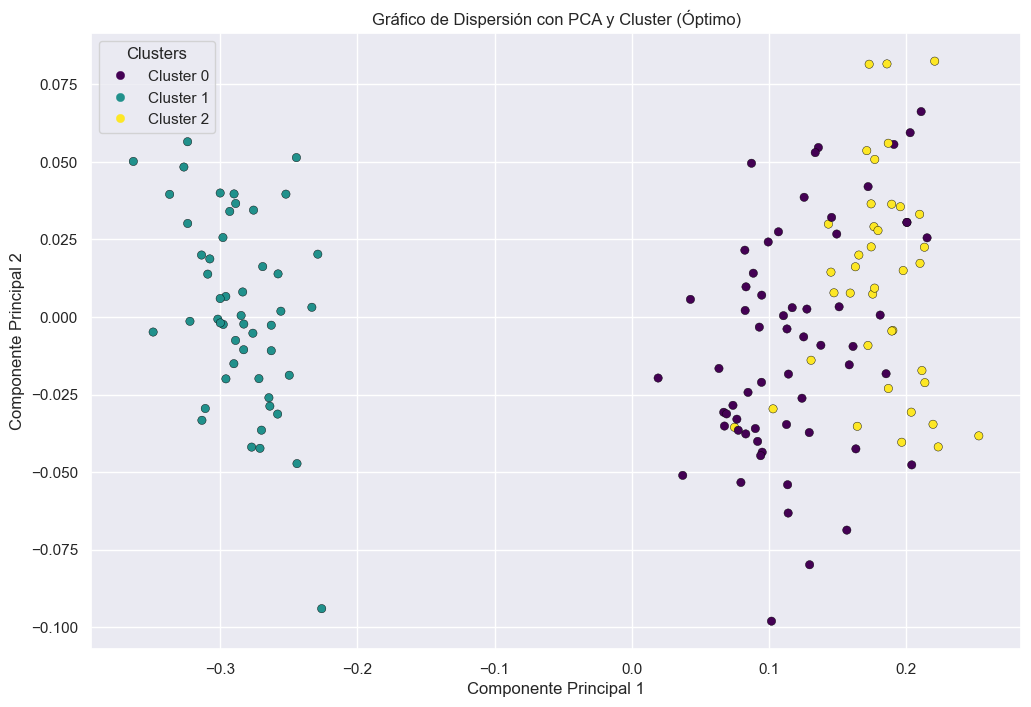

In [29]:
# Lista con los modelos de K-Means y sus nombres
modelos_kmeans = [
    (kmeans2_optimo_silhouette, 'Silhouette'),
    (kmeans2_optimo_codo, 'Codo'),
    (kmeans_optimo, 'Óptimo')
]

# Crear gráficos para cada modelo
for modelo, nombre in modelos_kmeans:
    plt.figure(figsize=(12, 8))
    
    # Gráfico de dispersión con los resultados del modelo actual
    dispersion_irisPCA = plt.scatter(
        df_irisPCA[:, 0], 
        df_irisPCA[:, 1], 
        c=modelo.labels_, 
        cmap='viridis', 
        marker='o', 
        edgecolors='black', 
        linewidths=0.3
    )
    
    # Título y etiquetas
    plt.title(f'Gráfico de Dispersión con PCA y Cluster ({nombre})')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    
    # Crear leyenda con números de clusters
    cluster_labels = np.unique(modelo.labels_)
    handles, labels = dispersion_irisPCA.legend_elements()
    plt.legend(handles, [f'Cluster {i}' for i in cluster_labels], title="Clusters")
    
    # Mostrar el gráfico
    plt.show()


## Una ultima observacion es que cuando se grafica ya con PCA aunque usemos las etiquetas del modelo que fue entrenado sin los datos escalados, tiene los mismos resultados que uno que fue entrenado con los datos escalados solo por el hecho de usar el PCA; es decir, al mostrar las etiquetas sobre PCA sin haacer predicciones tienen los mismos resultados pero al hacer una predicción sale un resultado más erróneo

In [ ]:
df_irisPCA_obs = pd.DataFrame(df_irisPCA)
df_irisPCA_obs['grupo_optimo'] = clusters
df_irisPCA_obs

In [ ]:
df_irisPCA_obs.value_counts('grupo_optimo')

## Aquí se observan las predicciones del primer modelo utilizado, donde se ve una clara separacion de los valores correctos.

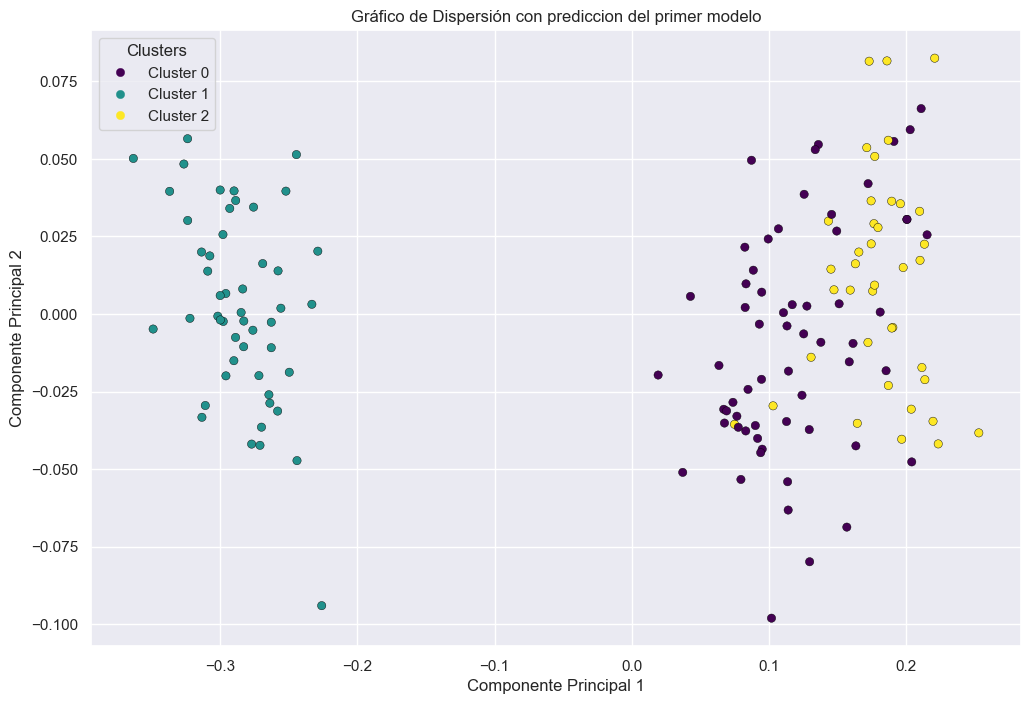

In [218]:
plt.figure(figsize=(12, 8))
    
# Gráfico de dispersión con los resultados del modelo actual
dispersion_irisPCA = plt.scatter(
    df_irisPCA[:, 0], 
    df_irisPCA[:, 1], 
    c=df_irisPCA_obs['grupo_optimo'], 
    cmap='viridis', 
    marker='o', 
    edgecolors='black', 
    linewidths=0.3
    )
    
# Título y etiquetas
plt.title(f'Gráfico de Dispersión con prediccion del primer modelo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear leyenda con números de clusters
cluster_labels = np.unique(kmeans2_optimo.labels_)
handles, labels = dispersion_irisPCA.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in cluster_labels], title="Clusters")

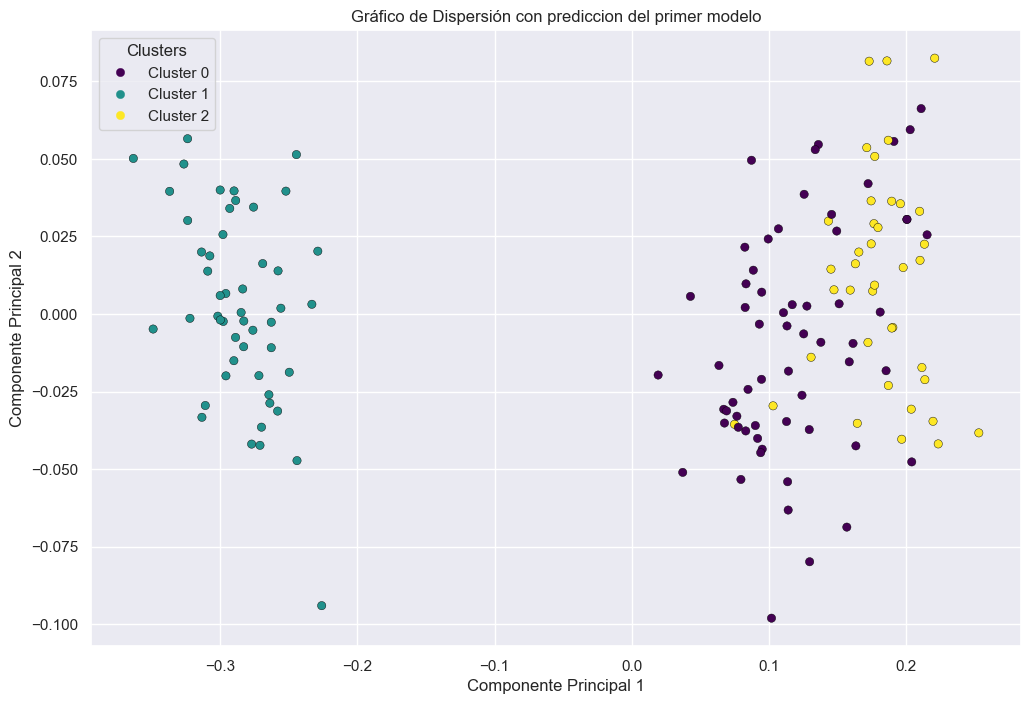

In [34]:
plt.figure(figsize=(12, 8))
    
# Gráfico de dispersión con los resultados del modelo actual
dispersion_irisPCA = plt.scatter(
    df_irisPCA[:, 0], 
    df_irisPCA[:, 1], 
    c=kmeans_optimo.labels_, 
    cmap='viridis', 
    marker='o', 
    edgecolors='black', 
    linewidths=0.3
    )
    
# Título y etiquetas
plt.title(f'Gráfico de Dispersión con prediccion del primer modelo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear leyenda con números de clusters
cluster_labels = np.unique(kmeans_optimo.labels_)
handles, labels = dispersion_irisPCA.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in cluster_labels], title="Clusters")

In [37]:
kmeans_optimo = KMeans(n_clusters=3, init= 'k-means++', random_state=1).fit(df_entrenamiento_iris)

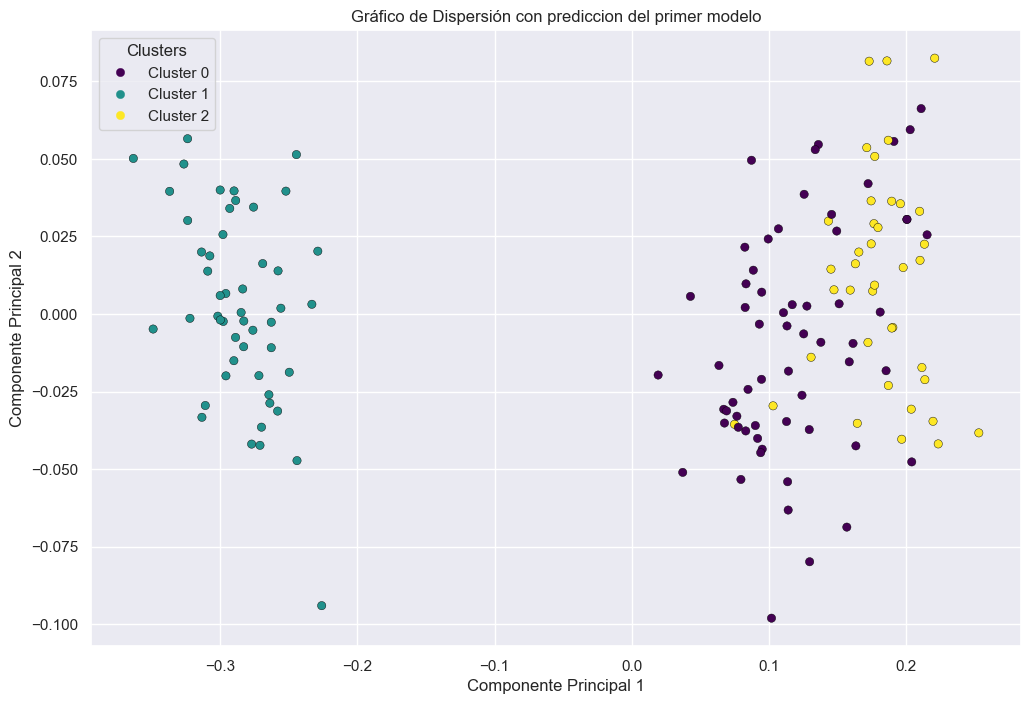

In [38]:
plt.figure(figsize=(12, 8))
    
# Gráfico de dispersión con los resultados del modelo actual
dispersion_irisPCA = plt.scatter(
    df_irisPCA[:, 0], 
    df_irisPCA[:, 1], 
    c=kmeans_optimo.labels_, 
    cmap='viridis', 
    marker='o', 
    edgecolors='black', 
    linewidths=0.3
    )
    
# Título y etiquetas
plt.title(f'Gráfico de Dispersión con prediccion del primer modelo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear leyenda con números de clusters
cluster_labels = np.unique(kmeans_optimo.labels_)
handles, labels = dispersion_irisPCA.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in cluster_labels], title="Clusters")